In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
sns.set_style('darkgrid')

In [2]:
df_glob = pd.read_csv('ANLSYS2/STROMAL/ACT_glob2.csv',index_col = 0)
df_ind = pd.read_csv('ANLSYS2/STROMAL/ACT_ind2.csv',index_col = 0)

#df_glob['global_order']= df_glob.global_order / 1350
# df_glob['local_order'] = df_glob.lcl_order/ 1350

df_glob2 = pd.read_csv('ANLSYS2/STROMAL/3PRFDR_glob.csv',index_col = 0)
df_ind2 = pd.read_csv('ANLSYS2/STROMAL/3PRFDR_ind.csv',index_col = 0)

#df_glob2['global_order']= df_glob2.global_order / 1350
# df_glob2['local_order'] = df_glob2.lcl_order/ 1350

# change name of PW

# df_ind[df_ind.type == 'PW'] = 'BA-cl'
# df_glob[df_glob.type == 'PW'].type = 'BA-cl'
# df_ind2[df_ind2.type == 'PW'].type = 'BA-cl'
# df_glob2[df_glob2.type == 'PW'] = 'BA-cl'

df_ind['model'] = 'act'
df_glob['model'] = 'act'
df_ind2['model'] = 'PRFDR'
df_glob2['model'] = 'PRFDR'

df_ind.head()

,type,iter,cell_id,speed,model
0,ER,2,0,4.515661,act
1,ER,2,1,4.101105,act
2,ER,2,2,4.312603,act
3,ER,2,3,4.107545,act
4,ER,2,4,4.306503,act


In [3]:
# normalize order by  n cells:
max_cells = {}
for tp in df_ind.type.unique():
    max_cell = max(df_ind[df_ind.type == tp].cell_id) 
    max_cells[tp] = max_cell

df_glob['n_cells'] = None

for key,val in max_cells.items():
    #df_glob[df_glob.type == key]
    df_glob.n_cells.loc[df_glob['type'] == key] = val
    #df.loc[df['shield'] > 6]

/home/lau/anaconda2/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
# normalize order by  n cells:
max_cells = {}
for tp in df_ind2.type.unique():
    max_cell = max(df_ind2[df_ind2.type == tp].cell_id) 
    max_cells[tp] = max_cell

df_glob2['n_cells'] = None

for key,val in max_cells.items():
    #df_glob[df_glob.type == key]
    df_glob2.n_cells.loc[df_glob2['type'] == key] = val
    #df.loc[df['shield'] > 6]

In [5]:
df_glob2.head()

,type,iter,pooled_persist,global_order,std_glbl_order,lcl_order,std_lcl,model,n_cells
0,ER,4,0.640924,344.688902,145.244236,1.234968,0.610035,PRFDR,1327
1,BA,1,0.675812,500.371432,269.597441,1.496047,0.861300,PRFDR,1344
2,PW,3,0.689408,561.189713,238.531421,1.434377,0.766796,PRFDR,1363
3,BA,0,0.679174,702.078654,274.179180,1.525212,0.872177,PRFDR,1344
4,OFRC,4,100.000000,13699.261967,1903.635310,7.966695,0.705722,PRFDR,1740


In [6]:
df_glob2.global_order = df_glob2.global_order/df_glob2.n_cells
df_glob.global_order = df_glob.global_order/df_glob.n_cells

In [7]:
mergd  = pd.concat([df_ind, df_ind2])
mergd = mergd.replace('PW', value = 'BA-cl')
mergd2  = pd.concat([df_glob, df_glob2])
mergd2 = mergd2.replace('PW', value = 'BA-cl')

mergd = mergd.rename(columns = {'pooled_persist':'persist'})
mergd2 = mergd2.rename(columns = {'pooled_persist':'persist'})

In [8]:
# mergd.sort_values('type',inplace = True)

# def sort_pd(key=None,reverse=False,cmp=None):
#     def sorter(series):
#         series_list = list(series)
#         return [series_list.index(i) for i in sorted(series_list,key=key)]
#     return sorter

# custom_dict = {'ER':1, 'BA':2, 'BA-cl':3,'WS':4,'GM':5,'OFRC':6}
# sort_by_custom_dict = sort_pd(key=custom_dict.get)

# mergd.iloc[sort_by_custom_dict(mergd['type'])]

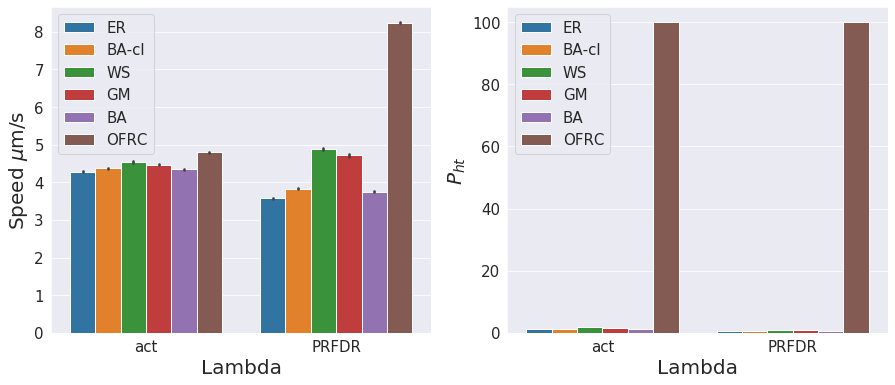

In [9]:
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,6))
sns.barplot(x = 'model',y = 'persist',units = 'iter',data = mergd2, hue = 'type',ax = ax2)
sns.barplot(x = 'model',y = 'speed',units = 'iter',data = mergd, hue = 'type', ax = ax1)

ax1.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax1.set_xlabel('Lambda',fontsize = 20)

ax2.set_ylabel('$P_{ht}$',fontsize = 20)
ax2.set_xlabel('Lambda',fontsize = 20)

ax1.legend(fontsize = 15,loc = 2)
ax2.legend(fontsize = 15,loc = 2)
plt.show()

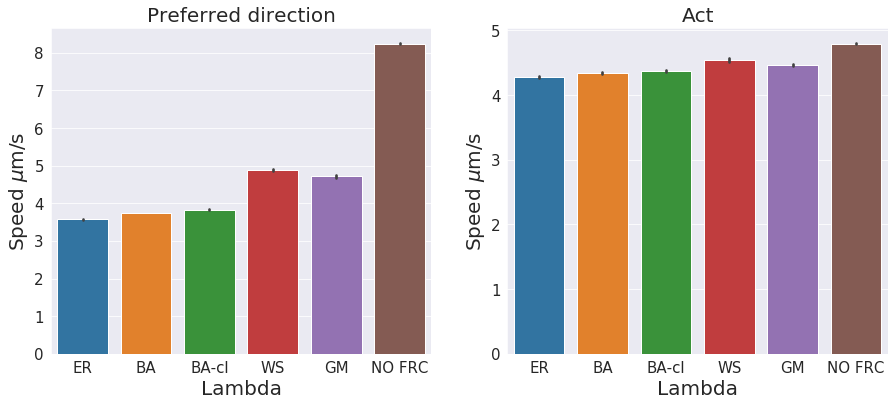

In [10]:
# order of bars ;
mergd = mergd.replace('OFRC','NO FRC')
ordr = ['ER','BA','BA-cl','WS','GM','NO FRC']
# speed plots :
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,6))
sns.barplot(x = 'type',y = 'speed',units = 'iter',data = mergd[mergd.model == 'PRFDR'],ax = ax1,order =ordr)
sns.barplot(x = 'type',y = 'speed',units = 'iter',data = mergd[mergd.model == 'act'],ax = ax2,order = ordr)

ax1.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax1.set_xlabel('Lambda',fontsize = 20)

ax2.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax2.set_xlabel('Lambda',fontsize = 20)

ax1.set_title('Preferred direction',fontsize = 20)
ax2.set_title('Act',fontsize = 20)
# ax1.legend(fontsize = 15,loc = 2)
# ax2.legend(fontsize = 15,loc = 2)
plt.show()

['ER' 'BA-cl' 'WS' 'GM' 'BA']


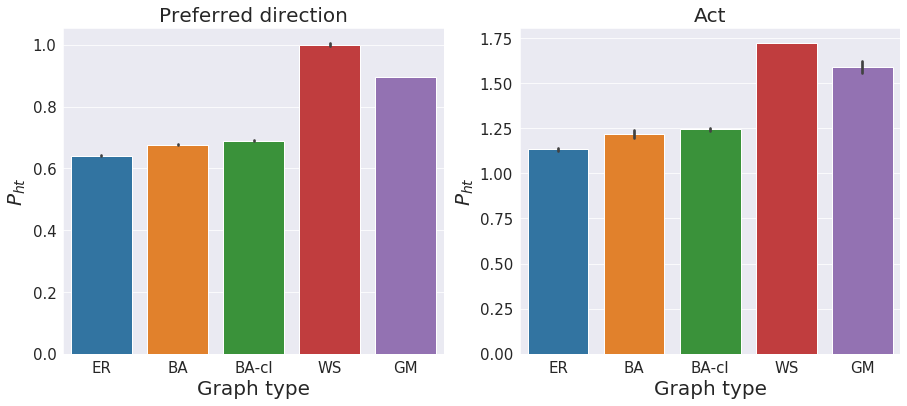

In [11]:
# persistance plots : 
copy = mergd2[mergd2.type != 'OFRC']

# copy.drop(copy.loc[copy['type']=='OFRC'].index, inplace=True)
print(copy.type.unique())

f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,6))
sns.barplot(x = 'type',y = 'persist',units = 'iter',data = copy[copy.model == 'PRFDR'],ax = ax1,order =ordr[:-1],ci = 'sd')
sns.barplot(x = 'type',y = 'persist',units = 'iter',data = copy[copy.model == 'act'],ax = ax2,order = ordr[:-1],ci = 'sd')

ax1.set_ylabel('$P_{ht}$',fontsize = 20)
ax1.set_xlabel('Graph type',fontsize = 20)

ax2.set_ylabel('$P_{ht}$',fontsize = 20)
ax2.set_xlabel('Graph type',fontsize = 20)

ax1.set_title('Preferred direction',fontsize = 20)
ax2.set_title('Act',fontsize = 20)
# ax1.legend(fontsize = 15,loc = 2)
# ax2.legend(fontsize = 15,loc = 2)
plt.show()

['ER' 'BA-cl' 'WS' 'GM' 'BA' 'NO FRC']


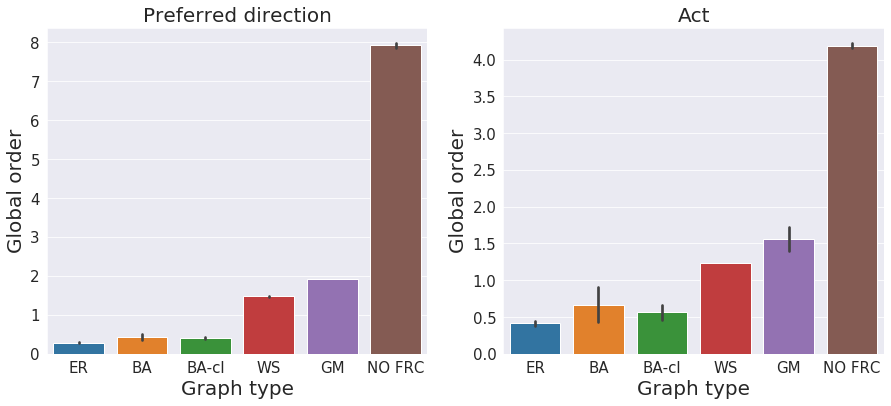

In [12]:
# Global order : 
copy = mergd2
mergd2 = mergd2.replace('OFRC','NO FRC')
print(mergd2.type.unique())
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,6))
sns.barplot(x = 'type',y = 'global_order',units = 'iter',data = mergd2[mergd2.model == 'PRFDR'],ax = ax1,order =ordr,ci = 'sd')
sns.barplot(x = 'type',y = 'global_order',units = 'iter',data = mergd2[mergd2.model == 'act'],ax = ax2,order = ordr,ci = 'sd')

ax1.set_ylabel('Global order',fontsize = 20)
ax1.set_xlabel('Graph type',fontsize = 20)

ax2.set_ylabel('Global order',fontsize = 20)
ax2.set_xlabel('Graph type',fontsize = 20)

ax1.set_title('Preferred direction',fontsize = 20)
ax2.set_title('Act',fontsize = 20)
# ax1.legend(fontsize = 15,loc = 2)
# ax2.legend(fontsize = 15,loc = 2)
plt.show()


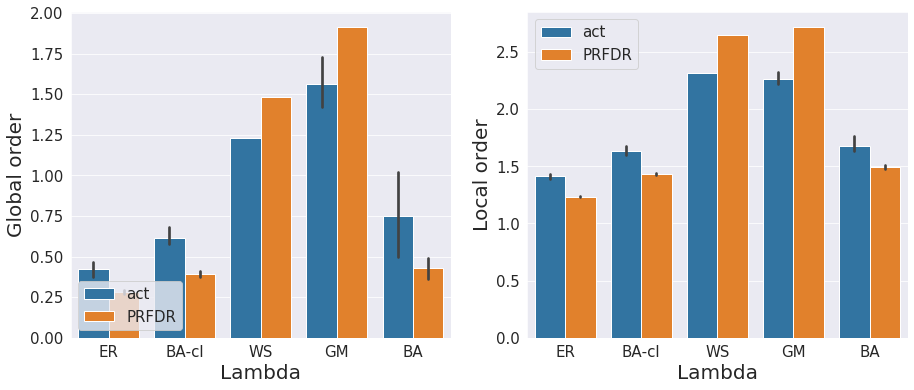

In [14]:
#sns.barplot(x = 'type',y = 'speed',data = df_ind)
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,6))
sns.barplot(x = 'type',y = 'global_order',units = 'iter',data = mergd2, hue = 'model',ax = ax1)
sns.barplot(x = 'type',y = 'lcl_order',units = 'iter',data = mergd2, hue = 'model', ax = ax2)
ax1.set_ylabel('Global order',fontsize = 20)
ax1.set_xlabel('Lambda',fontsize = 20)

ax2.set_ylabel('Local order',fontsize = 20)
ax2.set_xlabel('Lambda',fontsize = 20)

ax1.legend(fontsize = 15,loc = 3)
ax2.legend(fontsize = 15)
plt.show()

In [ ]:
sns.barplot(x = 'type',y = 'pooled_persist',data = mergd,units = 'iter',hue = 'model')

In [ ]:
sns.barplot(x = 'type',y = 'global_order',data = mergd, units = 'iter')

In [ ]:
sns.barplot(x = 'type',y = 'lcl_order',data = df_glob)

In [ ]:
f, (ax1, ax2,ax3) = plt.subplots(1,3,figsize = (15,8))
sns.lineplot(x = 'dens',y = 'speed',data = df_ind,ax = ax1)
sns.lineplot(x = 'dens',y = 'persist',data = df_ind,ax = ax2)
sns.lineplot(x = 'density',y = 'global_order',data = df_glob,ax = ax3)
sns.lineplot(x = 'density',y = 'lcl_order',data = df_glob,ax = ax3,legend = 'brief')

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.lineplot(x = 'dens',y = 'speed',data = df_ind,ax = ax1)
sns.lineplot(x = 'dens',y = 'persist',data = df_ind,ax = ax2)

In [ ]:
print(df_glob.head())
df_glob['norm_order']= df_glob.sum_order / (df_glob.density * 217)
df_glob['norm_lcl'] = df_glob.lcl_order/ (df_glob.density * 217)

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.lineplot(x = 'density',y = 'norm_order',data = df_glob,ax = ax1)
#sns.lineplot(x = 'density',y = 'sum_order',data = df_glob,ax = ax2)
#sns.lineplot(x = 'density',y = 'sum_order',data = df_glob,ax = ax2)#,size = 'std_sum_order'
#sns.lineplot(x = 'density',y = 'lcl_order',data = df_glob,ax = ax2)
#sns.lineplot(x = 'density',y = 'norm_lcl',data = df_glob,ax = ax2)#,size = 'std_lcl'
sns.lineplot(x = 'density',y = 'lcl_order',data = df_glob,ax = ax2)#,size = 'std_lcl'

In [ ]:
df_glob.density.unique()

In [ ]:
df_glob.count()

In [ ]:
np.linspace(500,1500,11)


In [ ]:
np.linspace(0.1,1,10)

In [ ]:
 np.linspace(500,3000,6)